Below you can find a sample of the raw data so that you can have a better understanding of it. The data is structured as JSON.

In [ ]:
import requests
import json
import time

API_KEY = 'M587O90XBK4IZHJO'
SYMBOL = 'AAPL'

def fetch_stock_data(symbol, api_key):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=1min&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    return data

fetch_stock_data(SYMBOL, API_KEY)

{'Meta Data': {'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
  '2. Symbol': 'AAPL',
  '3. Last Refreshed': '2024-08-06 19:59:00',
  '4. Interval': '1min',
  '5. Output Size': 'Compact',
  '6. Time Zone': 'US/Eastern'},
 'Time Series (1min)': {'2024-08-06 19:59:00': {'1. open': '205.0800',
   '2. high': '205.5000',
   '3. low': '205.0000',
   '4. close': '205.2400',
   '5. volume': '3508'},
  '2024-08-06 19:58:00': {'1. open': '205.0600',
   '2. high': '205.1000',
   '3. low': '205.0000',
   '4. close': '205.0500',
   '5. volume': '2609'},
  '2024-08-06 19:57:00': {'1. open': '205.1550',
   '2. high': '205.3200',
   '3. low': '205.0200',
   '4. close': '205.0500',
   '5. volume': '369'},
  '2024-08-06 19:56:00': {'1. open': '205.2600',
   '2. high': '205.3000',
   '3. low': '205.0900',
   '4. close': '205.1500',
   '5. volume': '3675'},
  '2024-08-06 19:55:00': {'1. open': '205.4000',
   '2. high': '205.4000',
   '3. low': '205.2550',
   '4. close': '205.

The first step is to download, install, and configure Java, Kafka, and Zookeeper by running the following commands:

In [ ]:
#install java

sudo apt update
sudo apt install openjdk-11-jdk -y


java -version

# download compressed file with apache kafka binary

wget https://downloads.apache.org/kafka/3.8.0/kafka_2.13-3.8.0.tgz

mkdir Downloads/kafka

tar -xzf kafka_2.13-3.8.0.tgz

mv kafka_2.13-3.8.0 Downloads/kafka

cd Downloads/kafka/kafka_2.13-3.8.0

# configure zookeper

nano config/zookeeper.properties

'''dataDir=/tmp/zookeeper
clientPort=2181
maxClientCnxns=0'''

# start zookeeper

bin/zookeeper-server-start.sh config/zookeeper.properties

# start kafka

bin/kafka-server-start.sh config/server.properties



Once Zookeeper and Kafka are running, we can create the Python script that will integrate Kafka and an external API (Alpha Vantage) to retrieve stock price data periodically and publish it to a Kafka topic.  

In [ ]:
#crear archivo python con el siguiente script

mkdir Downloads/python

cd Downloads/python

nano extraction.py


The script creates a Kafka topic named 'stock_prices'. The number of partitions and replication factors is set to one for simplicity, but you can increase these parameters as more computational resources are needed.

In this case, Kafka is running locally on port 9092, so this is set as the address of the Kafka broker.

Then, a function to retrieve the data from the API is defined. The response from the API is expected in JSON format, so we will parse the response into a Python dictionary.

Finally, the main() function ensures that the Kafka topic exists (otherwise, it will create it on the Kafka broker), creates a Kafka producer to send stock data messages to the Kafka topic, and sets up an infinite loop to retrieve and send the data every 86,400 seconds (1 day). This one-day pause between updates is to avoid hitting API limits and to match a daily update frequency.

In summary, this code effectively pulls stock data from an external API and publishes it to a Kafka topic, simulating a near real-time feed of stock prices for downstream consumers.



In [ ]:
from kafka.admin import KafkaAdminClient, NewTopic
from kafka import KafkaProducer
import requests
import json
import time

KAFKA_BOOTSTRAP_SERVERS = 'localhost:9092'
KAFKA_TOPIC = 'stock_prices'
API_KEY = 'M587O90XBK4IZHJO'
SYMBOL = 'AAPL'

def create_kafka_topic(topic_name, bootstrap_servers):
    admin_client = KafkaAdminClient(
        bootstrap_servers=bootstrap_servers,
        client_id='test_client'
    )

    topic_list = [NewTopic(name=topic_name, num_partitions=1, replication_factor=1)]
    admin_client.create_topics(new_topics=topic_list, validate_only=False)

def fetch_stock_data(symbol, api_key):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=1min&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    return data

def main():
    create_kafka_topic(KAFKA_TOPIC, KAFKA_BOOTSTRAP_SERVERS)

    producer = KafkaProducer(bootstrap_servers=KAFKA_BOOTSTRAP_SERVERS,
                             value_serializer=lambda v: json.dumps(v).encode('utf-8'))

    while True:
        stock_data = fetch_stock_data(SYMBOL, API_KEY)
        producer.send(KAFKA_TOPIC, stock_data)
        time.sleep(86400)

if __name__ == "__main__":
    main()



Before running the script, the following libraries must be installed, which can be done using a .txt file. After this, we can run the Python script.

In [ ]:
nano requirements.txt

"""
kafka-python === 2.0.2
pyspark
psycopg2-binary
pandas
"""

sudo apt install python3-pip

pip install -r requirements.txt

python3 extraction.py


If you wish to ensure that everything has been working correctly, you can use the following commands to check the topic list and the output received by a Kafka consumer subscribed to the stock_price topic. This output should look like the raw data.

In [ ]:
bin/kafka-topics.sh --list --bootstrap-server localhost:9092

bin/kafka-console-consumer.sh --topic stock_prices --from-beginning --bootstrap-server localhost:9092


Now, we can install Postgres by running the following commands. Set 'password' as the user password.

In [ ]:
# Install Postgre SQL

sudo apt install postgresql postgresql-contrib

# Configure Postgre SQL

sudo -i -u postgres

createuser --interactive

"""postgres"""

sudo -u postgres psql

alter user postgres with password 'password';

pgAdmin 4 will be installed as our open-source administrator and development platform for PostgreSQL.

In [ ]:
# Install Pgadmin4

sudo apt install curl

curl -fsS https://www.pgadmin.org/static/packages_pgadmin_org.pub | sudo gpg --dearmor -o /usr/share/keyrings/packages-pgadmin-org.gpg

sudo sh -c 'echo "deb [signed-by=/usr/share/keyrings/packages-pgadmin-org.gpg] https://ftp.postgresql.org/pub/pgadmin/pgadmin4/apt/$(lsb_release -cs) pgadmin4 main" > /etc/apt/sources.list.d/pgadmin4.list && apt update'

# Install desktop version

sudo apt install pgadmin4-desktop


Once installed, open pgAdmin4 and set these parameters to configure it and connect it to PostgreSQL:

1. Open pgAdmin from your desktop.
2. Servers > Register > Server
3. General > Name: "localhost"
4. Connection > Host name/address: "localhost" (pgAdmin and the server are installed on the same computer)
5. Connection > Port: 5432
6. Connection > Username: postgres
7. Connection > Password: password
8. Save



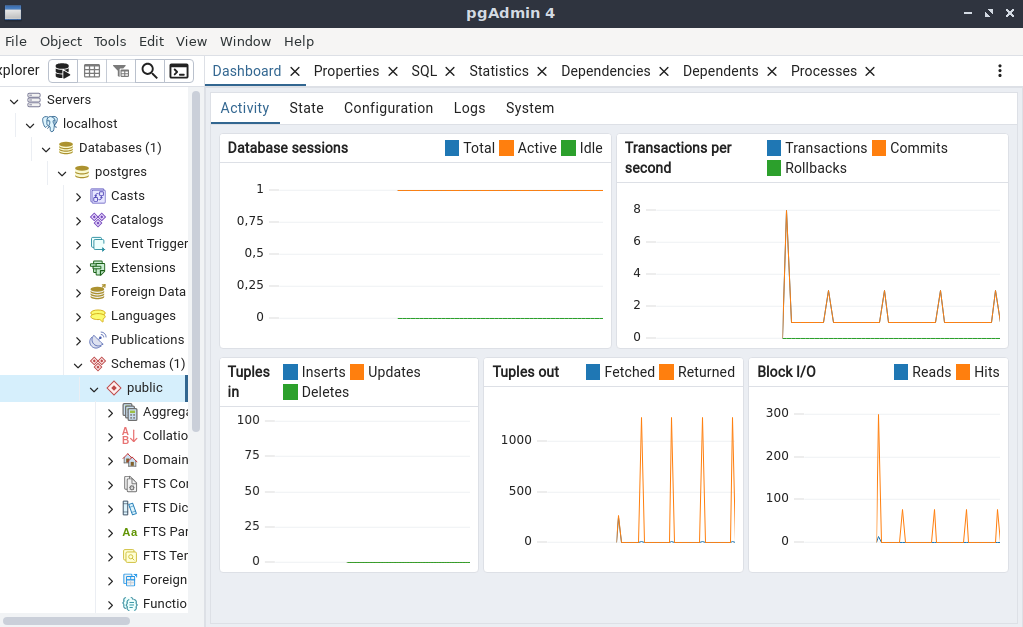

You can follow these steps to create the table that will store our data:

1. Right-click on Servers > localhost > Databases > postgres > Schemas > Tables
2. Select Query Tool
3. Create a table with the following SQL command.
4. Check from the terminal that the table is correctly created.


In [ ]:
CREATE TABLE ohlcv (
    time TIME PRIMARY KEY,
    date DATE,
    symbol VARCHAR(10),
    open NUMERIC(10, 4),
    high NUMERIC(10, 4),
    low NUMERIC(10, 4),
    close NUMERIC(10, 4),
    volume INTEGER
);

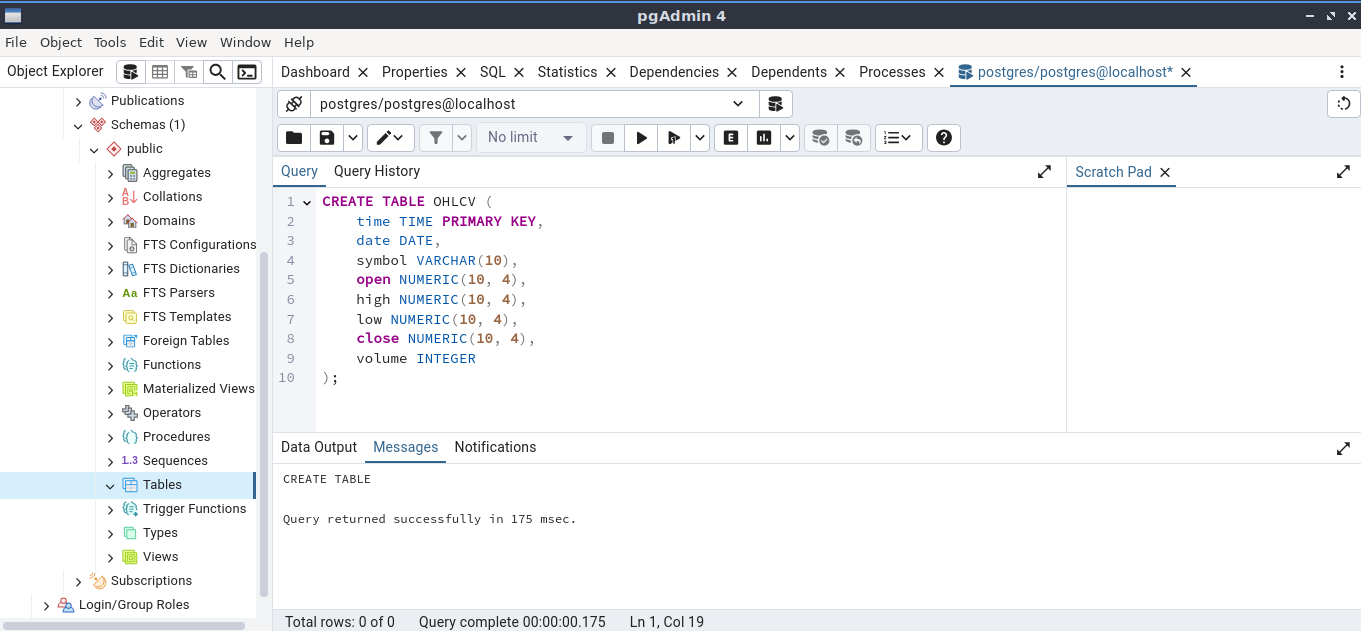

In [ ]:
sudo -u postgres psql

\dt

Create the Python file for data transformation and loading.

In [ ]:
cd Downloads/python

nano transload.py

Finally, the following script is created and run to transform the data retrieved from the Kafka topic and load it into the Postgres database.

Once the bootstrap server and the topic are both defined, the Spark session is initialized with the necessary Kafka integration package, allowing Spark to read from Kafka.

A schema needs to be defined for the incoming JSON data. This schema will be used to parse the JSON data into a structured format.

The print_batch function is responsible for processing each micro-batch of data:

1. It extracts and processes the metadata and the time series data from the structured DataFrame.
2. The time series data is converted into a list of rows, where each row contains the timestamp, stock symbol, and its open, high, low, close, and volume values.
3. The resulting rows are assembled into a new Spark DataFrame, where the timestamp is split into separate date and time columns.

The function upsert_to_postgres inserts the processed stock data into the PostgreSQL table ohlcv. If a record with the same time already exists, it updates the existing record (using the ON CONFLICT clause). This ensures that the data is either inserted or updated correctly.

Finally, the process_batch function links the two main processing steps: print_batch (transforms the data) and upsert_to_postgres (inserts/updates the data into the database). The stream execution sets up the continuous stream processing using Spark's foreachBatch, where each micro-batch is processed by the process_batch function. The script keeps running until terminated.

In conclusion, this script forms an end-to-end data pipeline where stock data is fetched in real-time from a Kafka topic, processed into a structured format using PySpark, and then stored in a PostgreSQL database. The foreachBatch construct allows for batch-level processing of streaming data, ensuring that each micro-batch is processed and upserted efficiently into the database.


In [ ]:
import psycopg2
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, from_json, split
from pyspark.sql.types import StructType, StructField, StringType, MapType

KAFKA_BOOTSTRAP_SERVERS = 'localhost:9092'
KAFKA_TOPIC = 'stock_prices'

# Initialize Spark session
spark = SparkSession.builder \
    .appName("StockDataETL") \
    .config("spark.jars.packages", "org.apache.spark:spark-sql-kafka-0-10_2.12:3.1.2") \
    .getOrCreate()

# Define schema for JSON parsing
schema = StructType([
    StructField("Meta Data", MapType(StringType(), StringType()), True),
    StructField("Time Series (1min)", MapType(StringType(), MapType(StringType(), StringType())), True)
])

# Read data from Kafka
stock_dict = spark.readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", KAFKA_BOOTSTRAP_SERVERS) \
    .option("subscribe", KAFKA_TOPIC) \
    .option("startingOffsets", "earliest") \
    .load()

# Cast the value column to STRING and parse JSON
stock_dict = stock_dict.selectExpr("CAST(value AS STRING) as json") \
    .withColumn("data", from_json(col("json"), schema))

# Print a sample of the data
def print_batch(batch_df, batch_id):
    meta_data = batch_df.select(col("data.`Meta Data`"))
    time_series_data = batch_df.select(col("data.`Time Series (1min)`"))

    # Collect the data to the driver for further processing
    meta_data_dict = meta_data.collect()[0].asDict()["Meta Data"]
    time_series_dict = time_series_data.collect()[0].asDict()["Time Series (1min)"]

    # Convert the time series dictionary into a list of Row objects
    rows = []
    for timestamp, values in time_series_dict.items():
        row = {
            "timestamp": timestamp,
            "symbol": meta_data_dict["2. Symbol"],
            "open": float(values["1. open"]),
            "high": float(values["2. high"]),
            "low": float(values["3. low"]),
            "close": float(values["4. close"]),
            "volume": int(values["5. volume"])
        }
        rows.append(row)

    # Create a Spark DataFrame from the list of rows
    stock_df = spark.createDataFrame(rows)

    # Split timestamp into date and time
    stock_df = stock_df.withColumn("date", split(col("timestamp"), " ").getItem(0)) \
                       .withColumn("time", split(col("timestamp"), " ").getItem(1))

    # Select the relevant columns and reorder them
    final_df = stock_df.select(
        col("date").alias("date"),
        col("time").alias("time"),
        col("symbol").alias("symbol"),
        col("open").alias("open"),
        col("high").alias("high"),
        col("low").alias("low"),
        col("close").alias("close"),
        col("volume").alias("volume")
    )

    return final_df

# Function to perform upsert (update/insert)
def upsert_to_postgres(transformed_df, batch_id):
    # Convert Spark DataFrame to Pandas DataFrame
    pdf = transformed_df.toPandas()

    # Establish connection to PostgreSQL
    conn = psycopg2.connect(
        dbname='postgres',
        user='postgres',
        password='password',
        host='localhost'
    )
    cursor = conn.cursor()

    # Upsert each row
    for _, row in pdf.iterrows():
        cursor.execute("""
            INSERT INTO ohlcv (time, date, symbol, open, high, low, close, volume)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
            ON CONFLICT (time) DO UPDATE SET
                date = EXCLUDED.date,
                symbol = EXCLUDED.symbol,
                open = EXCLUDED.open,
                high = EXCLUDED.high,
                low = EXCLUDED.low,
                close = EXCLUDED.close,
                volume = EXCLUDED.volume;
        """, (row.time, row.date, row.symbol, row.open, row.high, row.low, row.close, row.volume))

    # Commit and close connection
    conn.commit()
    cursor.close()
    conn.close()

# Function to call both print_batch and upsert_to_postgres
def process_batch(batch_df, batch_id):
    transformed_df = print_batch(batch_df, batch_id)
    upsert_to_postgres(transformed_df, batch_id)

# Write the stream and apply the combined function
query = stock_dict.writeStream \
    .foreachBatch(process_batch) \
    .start()

query.awaitTermination()


Once run, we can check the resulting Postgres table from pgAdmin 4. Note that time has been set as the primary key since the data will never exceed one day.

In [ ]:
python3 transload.py

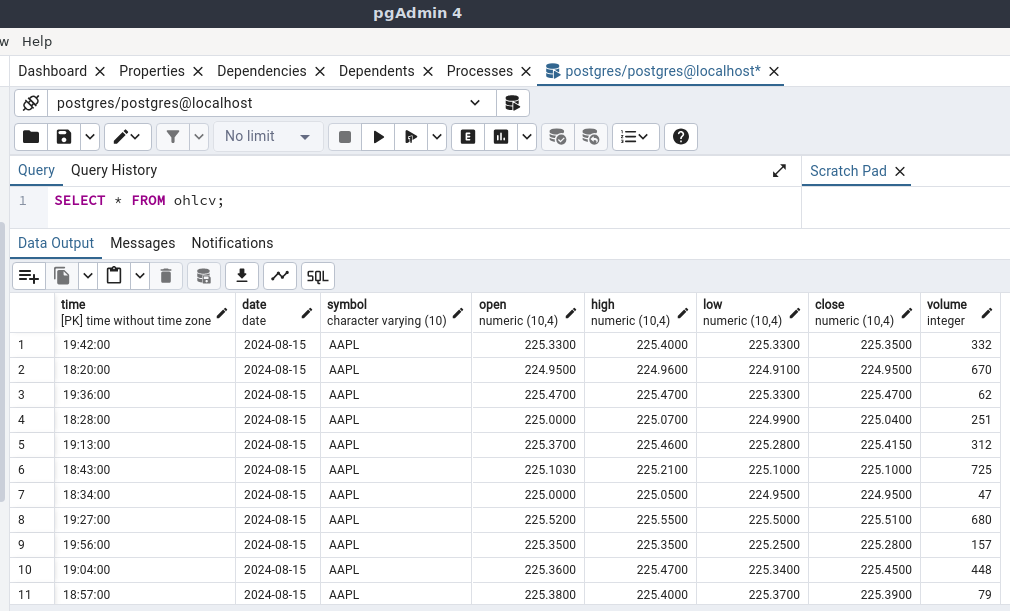